In [59]:
#importing modules
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [12]:
#importing under sampling dataset
ecommerce_df = pd.read_csv(Path('Resources/Cleaned_data/under_sampling_data.csv'))

In [13]:
#looking the few rows
ecommerce_df.head()

,Administrative_Avg,Informational_Avg,ProductRelated_Avg,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,44.541667,40.666667,53.708333,0.000000,0.018182,0.000000,0.0,Dec,2,2,2,1,Returning_Visitor,False,False
1,0.000000,0.000000,53.166667,0.000000,0.050000,0.000000,0.0,Mar,1,1,6,1,Returning_Visitor,True,False
2,0.000000,0.000000,220.678571,0.014286,0.033333,0.000000,0.0,Dec,1,1,3,1,Returning_Visitor,False,False
3,5.666667,0.000000,24.086352,0.009524,0.040317,0.000000,0.0,Dec,2,2,1,2,Returning_Visitor,False,False
4,22.260000,0.000000,30.232723,0.000000,0.008337,17.634346,0.0,Nov,2,2,9,2,Returning_Visitor,False,False


In [14]:
ecommerce_df["Revenue"].value_counts()

False    1908
True     1908
Name: Revenue, dtype: int64

In [15]:
#shape of dataframe
ecommerce_df.shape

(3816, 15)

In [16]:
# create feature matrix (X)
#selecting all columns except 'Revenue'
X=ecommerce_df.drop('Revenue', axis=1) 

# create response vector (y)
##selecting 'Revenue' column
y=ecommerce_df['Revenue'].values 

In [17]:
# Seperating categorical columns
cat_columns=['Month','OperatingSystems', 'Browser', 'Region',
             'TrafficType','VisitorType','Weekend']

In [18]:
# One-hot encoding the entire dataframe
X_dummies = pd.get_dummies(X, columns = cat_columns)
print(X_dummies.columns)
X_dummies.head()

Index(['Administrative_Avg', 'Informational_Avg', 'ProductRelated_Avg',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month_Aug',
       'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3',
       'OperatingSystems_Other', 'Browser_1', 'Browser_10', 'Browser_2',
       'Browser_4', 'Browser_5', 'Browser_6', 'Browser_Other', 'Region_1',
       'Region_2', 'Region_3', 'Region_4', 'Region_5', 'Region_6', 'Region_7',
       'Region_8', 'Region_9', 'TrafficType_1', 'TrafficType_10',
       'TrafficType_11', 'TrafficType_13', 'TrafficType_2', 'TrafficType_3',
       'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_8',
       'TrafficType_Other', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Weekend_False', 'Weekend_True'],
      dtype='object')


,Administrative_Avg,Informational_Avg,ProductRelated_Avg,BounceRates,ExitRates,PageValues,SpecialDay,Month_Aug,Month_Dec,Month_Feb,...,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_8,TrafficType_Other,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,44.541667,40.666667,53.708333,0.000000,0.018182,0.000000,0.0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
1,0.000000,0.000000,53.166667,0.000000,0.050000,0.000000,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0.000000,0.000000,220.678571,0.014286,0.033333,0.000000,0.0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,5.666667,0.000000,24.086352,0.009524,0.040317,0.000000,0.0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
4,22.260000,0.000000,30.232723,0.000000,0.008337,17.634346,0.0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [19]:
#Total columns before and after one-hot encoding
print(f'Total column before one hot encoding: {X.shape[1]}, Total columns after one hot encoding: {X_dummies.shape[1]}')

Total column before one hot encoding: 14, Total columns after one hot encoding: 53


In [22]:
# Converting output labels to 0 and 1
y_label = LabelEncoder().fit_transform(y)
y_label

array([0, 0, 0, ..., 1, 1, 1])

In [23]:
#Training set**: Used to train the classifier.
#Testing set**: Used to estimate the error rate of the trained classifier.
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y_label, random_state=42)

In [24]:
# Scaling the X data by using StandardScaler()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-0.25984905, -0.26915436,  1.38554087, ...,  0.48224282,
         0.55717103, -0.55717103],
       [-0.46387811,  0.31627294, -0.34015459, ...,  0.48224282,
         0.55717103, -0.55717103],
       [-0.46387811, -0.26915436, -1.05942478, ...,  0.48224282,
         0.55717103, -0.55717103],
       ...,
       [-0.46387811, -0.26915436,  0.22058076, ...,  0.48224282,
         0.55717103, -0.55717103],
       [-0.46387811, -0.26915436,  0.07184404, ..., -2.07364414,
         0.55717103, -0.55717103],
       [-0.02820316,  0.58319748, -0.37365499, ...,  0.48224282,
         0.55717103, -0.55717103]])

In [25]:
# Transforming the test dataset based on the fit from the training dataset
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 0.21621873, -0.26915436, -0.57945596, ..., -2.07364414,
         0.55717103, -0.55717103],
       [-0.13777792, -0.26915436, -0.40758609, ...,  0.48224282,
         0.55717103, -0.55717103],
       [ 0.42957387,  0.35502945, -0.47588607, ...,  0.48224282,
         0.55717103, -0.55717103],
       ...,
       [ 0.45273756, -0.26915436,  0.74889613, ...,  0.48224282,
        -1.79478103,  1.79478103],
       [ 2.42106239, -0.26915436,  0.1023663 , ...,  0.48224282,
        -1.79478103,  1.79478103],
       [ 0.16747686,  0.07506465, -0.45772341, ...,  0.48224282,
         0.55717103, -0.55717103]])

In [30]:
#defining function for model scoring with training set only
def train_score(model, X_train_scaled=X_train_scaled, y_train=y_train):
    #printing the accuracy score
    train_score=model.score(X_train_scaled, y_train)
    print("******************Train Score******************")
    print(train_score)
    print()
    
    cvs=cross_val_score(model,X_train_scaled, y_train,cv=3, scoring='accuracy' )
    print("************Using K=3 cross validation**********")
    print(cvs)
    print()
    
    #predection on the test set and confusion matrix
    y_train_pred=cross_val_predict(model,X_train_scaled, y_train,cv=3)
    cm=confusion_matrix(y_train, y_train_pred)
    print("******Confusion Matrix using cross_val_predict****")
    print(cm)
    print()
    
    #classification report
    cr=classification_report(y_train, y_train_pred)
    print("***********Classification Report******************")
    print(cr)
    print()
    
    #roc curve
    y_train_predc=cross_val_predict(model,X_train_scaled, y_train,cv=3,
                                    method="predict_proba")
    y_proba = y_train_predc[:,1]  #proba of positive class
    fpr, tpr, thresholds = roc_curve(y_train, y_proba)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"roc curve for {model}")
    print("ROC Curve")
    plt.show()
    
    # area under the curve (AUC)
    roc_auc = auc(fpr, tpr)
    roc_auc
    print()
    print("**************Area under the curve******************")
    print(roc_auc)
    
    
    
#defining function for model scoring with test set
def test_score(model, X_train_scaled=X_train_scaled, X_test_scaled=X_test_scaled, 
               y_train=y_train,y_test=y_test):
    #printing the accuracy score
    train_score=model.score(X_train_scaled, y_train)
    test_score=model.score(X_test_scaled, y_test)
    print("********************Train Score******************")
    print(train_score)
    print()

    print("*********************Test Score******************")
    print(test_score)
    print()
    
    #predection on the test set and confusion matrix
    y_pred=model.predict(X_test_scaled)
    cm=confusion_matrix(y_test, y_pred)
    print("**************Confusion Matrix******************")
    print(cm)
    print()
    
    #classification report
    cr=classification_report(y_test, y_pred)
    print("**********Classification Report******************")
    print(cr)
    print()
    
    #roc curve
    y_proba = model.predict_proba(X_test_scaled)[:,1]  #proba of positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"roc curve for {model}")
    print("ROC Curve")
    plt.show()
    
    # area under the curve (AUC)
    roc_auc = auc(fpr, tpr)
    roc_auc
    print()
    print("**************Area under the curve******************")
    print(roc_auc)


## Model 1: Stochastic Gradent Descent Classifier

In [40]:
# Creating a sgd classifier model on the scaled data
sgd=SGDClassifier(random_state=42, loss='log', penalty='l2')

# Fit the model to the data
sgd.fit(X_train_scaled, y_train)

SGDClassifier(loss='log', random_state=42)

******************Train Score******************
0.7896575821104123

************Using K=3 cross validation**********
[0.78197065 0.77463312 0.77568134]

******Confusion Matrix using cross_val_predict****
[[1117  303]
 [ 334 1108]]

***********Classification Report******************
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1420
           1       0.79      0.77      0.78      1442

    accuracy                           0.78      2862
   macro avg       0.78      0.78      0.78      2862
weighted avg       0.78      0.78      0.78      2862


ROC Curve


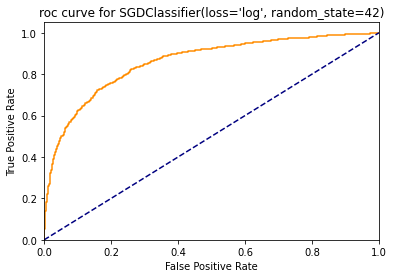


**************Area under the curve******************
0.8589332109159813


In [41]:
#score for logistic regression using only training data
train_score(sgd_clf)

### Tuning hyperparamaters using Grid Search CV for Stochastic Gradent Descent Classifier

In [51]:
#### Using GridSearchCV
param_grid_sgd = {
              'penalty': ['l1','l2', 'elasticnet'],
             'loss':['log', 'modified_huber'],
                'max_iter':[10, 50, 100,500,1000]}
grid_sgd = GridSearchCV(sgd, param_grid_sgd, cv=5, verbose=1, n_jobs=-1)

In [52]:
grid_sgd.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=SGDClassifier(loss='log', random_state=42),
             n_jobs=-1,
             param_grid={'loss': ['log', 'modified_huber'],
                         'max_iter': [10, 50, 100, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             verbose=1)

In [53]:
# List the best parameters for this dataset
print(grid_sgd.best_params_)

{'loss': 'log', 'max_iter': 50, 'penalty': 'l1'}


In [54]:
# List the best score
print(grid_sgd.best_score_)

0.7983975884499445


In [55]:
#best estimator
sgd_b=grid_sgd.best_estimator_
sgd_b

SGDClassifier(loss='log', max_iter=50, penalty='l1', random_state=42)

******************Train Score******************
0.7973445143256463

************Using K=3 cross validation**********
[0.77987421 0.79769392 0.778826  ]

******Confusion Matrix using cross_val_predict****
[[1206  214]
 [ 400 1042]]

***********Classification Report******************
              precision    recall  f1-score   support

           0       0.75      0.85      0.80      1420
           1       0.83      0.72      0.77      1442

    accuracy                           0.79      2862
   macro avg       0.79      0.79      0.78      2862
weighted avg       0.79      0.79      0.78      2862


ROC Curve


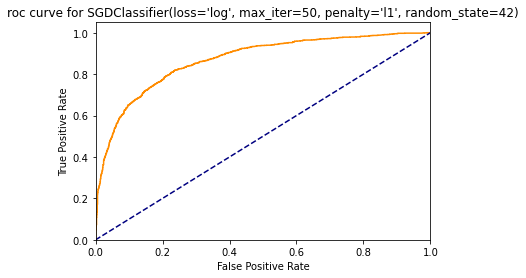


**************Area under the curve******************
0.8685650309624737


In [57]:
#score for Stochastic Gradent Descent Classifier using training data
train_score(sgd_b)

## Logistic Regression

In [60]:
# Creating a Logistic Regression model on the scaled data
lr= LogisticRegression()

# Fit the model to the data
lr.fit(X_train_scaled, y_train)

LogisticRegression()

******************Train Score******************
0.8200559049615653

************Using K=3 cross validation**********
[0.79769392 0.80712788 0.79874214]

******Confusion Matrix using cross_val_predict****
[[1177  243]
 [ 326 1116]]

***********Classification Report******************
              precision    recall  f1-score   support

           0       0.78      0.83      0.81      1420
           1       0.82      0.77      0.80      1442

    accuracy                           0.80      2862
   macro avg       0.80      0.80      0.80      2862
weighted avg       0.80      0.80      0.80      2862


ROC Curve


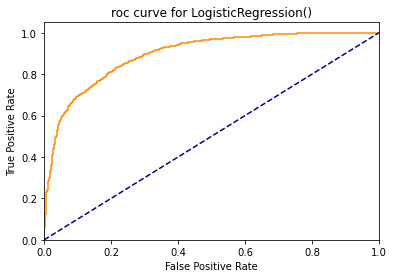


**************Area under the curve******************
0.8953409779062727


In [61]:
#score for logistic regression using only training data
train_score(lr)

### Tuning hyperparamaters  using Grid Search CV for Logistic Regresssion

In [71]:
#### Using GridSearchCV
param_grid_lr = {'C': [0.001, 0.01,0.1,1, 5, 10],
                'max_iter':[10, 20, 50,100,500,1000, 10000]}
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, verbose=1, n_jobs=-1)

In [72]:
grid_lr.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


/Users/sudippandey/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sudippandey/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sudippandey/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/sudippandey/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/sudippandey/.local

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10],
                         'max_iter': [10, 20, 50, 100, 500, 1000, 10000]},
             verbose=1)

In [26]:
# List the best parameters for this dataset
print(grid_lr.best_params_)

{'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}


In [27]:
# List the best score
print(grid_lr.best_score_)

0.8113207547169812


In [28]:
#best estimator
lr_b=grid_lr.best_estimator_
lr_b

LogisticRegression(C=0.1, penalty='l1', solver='saga')

****************Train Score******************
0.8162124388539483

**********Using K=3 cross validation**********
[0.80712788 0.81446541 0.81236897]

************Confusion Matrix using cross_val_predict******************
[[1212  208]
 [ 332 1110]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.78      0.85      0.82      1420
           1       0.84      0.77      0.80      1442

    accuracy                           0.81      2862
   macro avg       0.81      0.81      0.81      2862
weighted avg       0.81      0.81      0.81      2862


ROC Curve


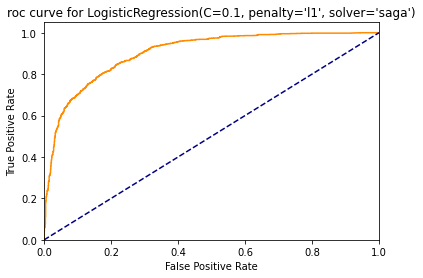


************Area under the curve******************
0.9029253189037136


In [29]:
#score for logistic regression using training and test data
train_score(lr_b)